In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
# 读取数据
file_path = "C:/Users/95459/Desktop/machine learning/new_2.csv"
df = pd.read_csv(file_path)

# 删除无用列（如果有）
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

# 处理类别变量（性别）
if 'gender' in df.columns:
    le = LabelEncoder()
    df['gender'] = le.fit_transform(df['gender'])  # Male → 1, Female → 0

# 目标变量（假设最后一列是 diabetes）
X = df.iloc[:, :-1]  
y = df.iloc[:, -1]   

# 标准化数值特征（逻辑回归对数据分布敏感）
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练逻辑回归模型
lr_model = LogisticRegression(max_iter=500, random_state=42)
lr_model.fit(X_train, y_train)

# 预测
y_pred = lr_model.predict(X_test)

# 评估模型
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# 输出结果
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", class_report)

# 创建 Pipeline 预处理 + 逻辑回归
logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # 标准化数据
    ('logreg', LogisticRegression(random_state=42))  # 逻辑回归模型
])

# 定义超参数搜索范围（包含默认参数）
param_grid = {
    'logreg__C': [1.0, 0.01, 0.1, 1, 10, 100],  
    'logreg__solver': ['lbfgs', 'liblinear', 'saga'],  
    'logreg__penalty': ['l2'],  
    'logreg__max_iter': [100, 200, 500], 
    'logreg__tol': [0.0001, 0.00001, 0.001],  
    'logreg__class_weight': [None, 'balanced']  
}

# 运行网格搜索（交叉验证）
grid_search = GridSearchCV(logreg_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 输出最佳参数和最佳得分
print("最佳参数:", grid_search.best_params_)
print("最佳准确率:", grid_search.best_score_)


Accuracy: 0.9625
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1827
           1       0.90      0.64      0.75       173

    accuracy                           0.96      2000
   macro avg       0.93      0.82      0.86      2000
weighted avg       0.96      0.96      0.96      2000

最佳参数: {'logreg__C': 100, 'logreg__class_weight': None, 'logreg__max_iter': 100, 'logreg__penalty': 'l2', 'logreg__solver': 'saga', 'logreg__tol': 0.001}
最佳准确率: 0.9573645247029393


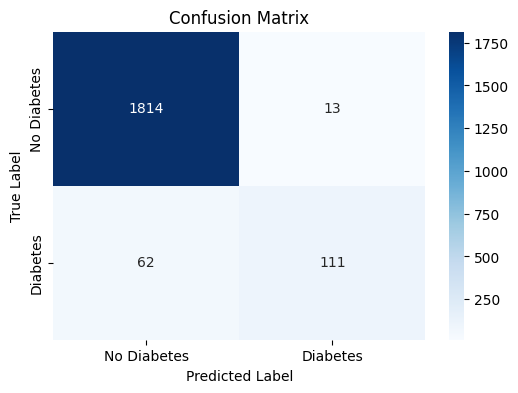

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 计算混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)

# 绘制混淆矩阵
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 读取数据
file_path = "C:/Users/95459/Desktop/machine learning/new_2.csv"
df = pd.read_csv(file_path)

# 删除无用列
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

# 处理类别变量
if 'gender' in df.columns:
    df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

# 分离特征和目标变量
X = df.drop(columns=['diabetes'], errors='ignore')
y = df['diabetes']

# 标准化数据（KNN 受距离影响，需要归一化）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 训练 KNN 模型
knn = KNeighborsClassifier(n_neighbors=5)  # 设定 k=5
knn.fit(X_train, y_train)

# 预测
y_pred = knn.predict(X_test)

# 评估模型
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"KNN Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# 预处理 + KNN pipeline
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # 标准化数据
    ('knn', KNeighborsClassifier())  # KNN 分类器
])

# 定义超参数搜索范围
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11, 15],  # 测试多个 K 值
    'knn__weights': ['uniform', 'distance'],   # 权重方式
    'knn__metric': ['euclidean', 'manhattan']  # 距离度量
}

# 运行网格搜索（5折交叉验证）
grid_search = GridSearchCV(knn_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 输出最佳参数和最佳得分
print("最佳参数:", grid_search.best_params_)
print("最佳准确率:", grid_search.best_score_)

KNN Accuracy: 0.9580
Confusion Matrix:
 [[1812   15]
 [  69  104]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      1827
           1       0.87      0.60      0.71       173

    accuracy                           0.96      2000
   macro avg       0.92      0.80      0.84      2000
weighted avg       0.96      0.96      0.95      2000

最佳参数: {'knn__metric': 'manhattan', 'knn__n_neighbors': 7, 'knn__weights': 'uniform'}
最佳准确率: 0.9622403846153846


In [37]:
# 获取最佳参数
best_params = grid_search.best_params_
best_n_neighbors = best_params['knn__n_neighbors']
best_weights = best_params['knn__weights']
best_metric = best_params['knn__metric']

# 使用最佳参数训练 KNN 模型
best_knn = KNeighborsClassifier(n_neighbors=best_n_neighbors, metric=best_metric, weights=best_weights)
best_knn.fit(X_train, y_train)

# 预测测试集
y_pred_best = best_knn.predict(X_test)


✅ KNN 最佳模型评估结果：
- 准确率 (Accuracy): 0.9580
- 精确率 (Precision): 0.9320
- 召回率 (Recall): 0.5549
- F1 分数 (F1 Score): 0.6957

📊 分类报告:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1827
           1       0.93      0.55      0.70       173

    accuracy                           0.96      2000
   macro avg       0.95      0.78      0.84      2000
weighted avg       0.96      0.96      0.95      2000



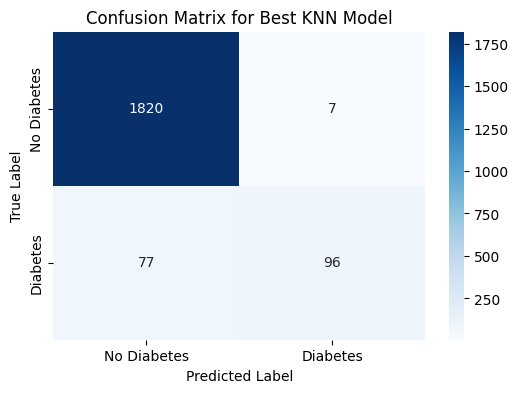

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# 计算指标
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)
conf_matrix = confusion_matrix(y_test, y_pred_best)
class_report = classification_report(y_test, y_pred_best)

# 输出评估结果
print(f"✅ KNN 最佳模型评估结果：")
print(f"- 准确率 (Accuracy): {accuracy:.4f}")
print(f"- 精确率 (Precision): {precision:.4f}")
print(f"- 召回率 (Recall): {recall:.4f}")
print(f"- F1 分数 (F1 Score): {f1:.4f}")
print("\n📊 分类报告:\n", class_report)

# 绘制混淆矩阵
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Best KNN Model")
plt.show()


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 读取数据
file_path = "C:/Users/95459/Desktop/machine learning/new_2.csv"
df = pd.read_csv(file_path)

# 处理缺失值（如有）
df = df.dropna()

# 1. 处理 'Gender' 变量 (二分类 -> Label Encoding)
gender_encoder = LabelEncoder()
df['gender'] = gender_encoder.fit_transform(df['gender'])  # Male -> 1, Female -> 0

# 假设最后一列是目标变量，前面的列是特征
X = df.iloc[:, :-1]  
y = df.iloc[:, -1]   

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建随机森林分类器
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 训练模型
rf_model.fit(X_train, y_train)

# 预测
y_pred = rf_model.predict(X_test)

# 评估模型
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# 输出结果
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.9700
Confusion Matrix:
 [[1824    3]
 [  57  116]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1827
           1       0.97      0.67      0.79       173

    accuracy                           0.97      2000
   macro avg       0.97      0.83      0.89      2000
weighted avg       0.97      0.97      0.97      2000



最佳随机森林参数: {'bootstrap': True, 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
✅ 随机森林模型评估结果：
- 准确率 (Accuracy): 0.9690
- 精确率 (Precision): 0.9440
- 召回率 (Recall): 0.6821
- F1 分数 (F1 Score): 0.7919

📊 分类报告:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1827
           1       0.94      0.68      0.79       173

    accuracy                           0.97      2000
   macro avg       0.96      0.84      0.89      2000
weighted avg       0.97      0.97      0.97      2000



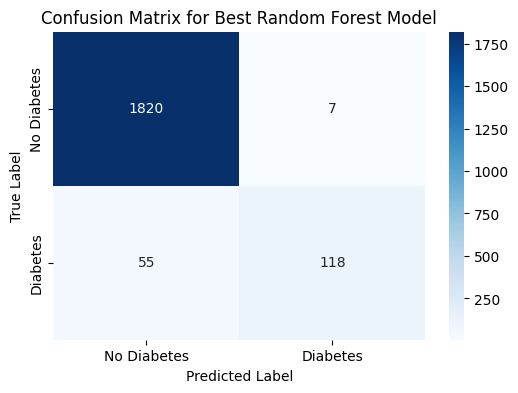

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# 创建随机森林模型
rf_model = RandomForestClassifier(random_state=42)

# 定义超参数搜索范围（包含默认参数）
param_grid = {
    'n_estimators': [100, 200, 300],  # 默认 100，尝试 200 和 300
    'max_depth': [None, 10, 20, 30],  # 默认 None，尝试限制深度
    'min_samples_split': [2, 5, 10],  # 默认 2，尝试 5 和 10
    'min_samples_leaf': [1, 2, 4],  # 默认 1，尝试 2 和 4
    'max_features': ['sqrt', 'log2', None],  # 默认 'sqrt'
    'bootstrap': [True, False]  # 默认 True，尝试 False
}

# 运行网格搜索（5折交叉验证）
grid_search_rf = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# 获取最佳参数
best_rf_params = grid_search_rf.best_params_
print("最佳随机森林参数:", best_rf_params)

# 训练最佳随机森林模型
best_rf = RandomForestClassifier(**best_rf_params, random_state=42)
best_rf.fit(X_train, y_train)

# 预测测试集
y_pred_rf = best_rf.predict(X_test)

# 计算评估指标
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

# 输出评估结果
print(f"✅ 随机森林模型评估结果：")
print(f"- 准确率 (Accuracy): {accuracy_rf:.4f}")
print(f"- 精确率 (Precision): {precision_rf:.4f}")
print(f"- 召回率 (Recall): {recall_rf:.4f}")
print(f"- F1 分数 (F1 Score): {f1_rf:.4f}")
print("\n📊 分类报告:\n", class_report_rf)

# 绘制混淆矩阵
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Best Random Forest Model")
plt.show()
